In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import scipy 
from scipy import stats
from scipy.stats import lognorm

### 1. Converting a probability into a 'sigma'. As discussed in class, 'sigma' refers to a probability in physics. Our first task is to figure out how, given a probability, to calculate the assoicated 'sigma' value. The sigma implicitly refers to the standard normal distribution (a Gaussian with mean zero and stard deviation of 1). As we discussed in class, integrals of the standard normal distribution give probabilities.

#### A)Look up the Normal distribution and read about it. A few potential starting points: Math is fun, Wolfram, and a useful z table

In [3]:
#A small table of some sigma values and their z-score for reference in part B
#These values where taken from https://en.wikipedia.org/wiki/Standard_normal_table

z_table = pd.DataFrame(columns={"Sigma", "Probability"})
z_table["Sigma"] = [0.5, 1, 2.3, 3.4, 4, 5]
z_table["Probability"] = [0.69146, 0.84134, 0.98928, 0.99966, 0.99997, 1.0]
z_table

,Probability,Sigma
0,0.69146,0.5
1,0.84134,1.0
2,0.98928,2.3
3,0.99966,3.4
4,0.99997,4.0
5,1.00000,5.0


#### B) As in class, try integrating the standard normal distribution. This can be done either with the erfc(), or calls to specific statistical cumulative probability distributions such as normcdf() in MatLab or stats.norm.cdf() in scipy. Try several values of sigma, and make sure you are getting values that match the z-table.

In [4]:
sigma_values = [0.1, 0.4, 0.5, 1, 2.3 , 3.4, 4, 5]
intergrated_snd = stats.norm.cdf(sigma_values)

z_table_test = pd.DataFrame(columns={"Sigma", "Probability"})
z_table_test["Sigma"] = sigma_values
z_table_test["Probability"] = intergrated_snd
z_table_test

,Probability,Sigma
0,0.539828,0.1
1,0.655422,0.4
2,0.691462,0.5
3,0.841345,1.0
4,0.989276,2.3
5,0.999663,3.4
6,0.999968,4.0
7,1.000000,5.0


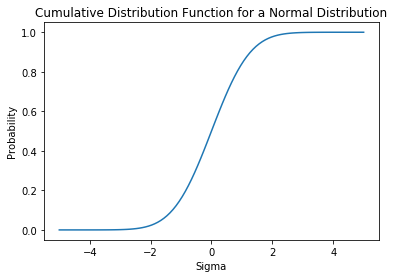

In [5]:
sigma_values = np.linspace(-5,5,100)
continuous_int_snd = stats.norm.cdf(sigma_values)

plt.xlabel('Sigma')
plt.ylabel('Probability')
plt.title('Cumulative Distribution Function for a Normal Distribution')
plt.plot(sigma_values, continuous_int_snd)

#### C) Now more often than not, we actually want to do the inverse: for a given probability determine the associated 'sigma' value: norminv() or erfcinv() in MatLab; stats.norm.ppf() in python. Try several probability values where you know what the answer should be (e.g. Probability associated with 1, 2, 5 sigma), and show that you get the right answer in terms of sigma.

In [6]:
print(stats.norm.ppf(0.4))      #showing anything below 0.5 returns a negative sigma
print(stats.norm.ppf(0.5))      #sigma of 0
print(stats.norm.ppf(0.841345)) #sigma of 1
print(stats.norm.ppf(0.989276)) # sigma of 2.3



-0.2533471031357997
0.0
1.000001049431045
2.30000388399833


#### D)Think about and explain the meaning of the minus sign that appears, and discuss how you will deal with it.

Anything less than a sigma (z-score) of 0.5 will be negative. By taking the absolute value of the ppf, we can effectively deal with the negative. This is acceptable since the standard normal distribution is centered around zero meaning the percentage of each sigma will be the same as its negative.

In [7]:
#Showing that both the positive and negative result in the same value
print(stats.norm.pdf(0.3, loc=0, scale=1))
print(stats.norm.pdf(-0.3, loc=0,scale=1))

0.38138781546052414
0.38138781546052414


### 2. Now let's explore some other continuous analytic distributions. Following the pattern from your first HW assigment, make both the analytic pdf() and a realization with ~100k samples using a built-in distribution; but this time don't use the Gaussian. Choose one of the following distributions: Rayleigh; Lognormal; Chi-Squared or Gamma; Exponential. You and your partner should choose different distributions.

#### A)Read up on your distribution

A log-normal distribution is a statistical distribution of logarithmic values from a related normal distribution.

#### B) Make plots (tweaking distribution and plot parameters as needed)

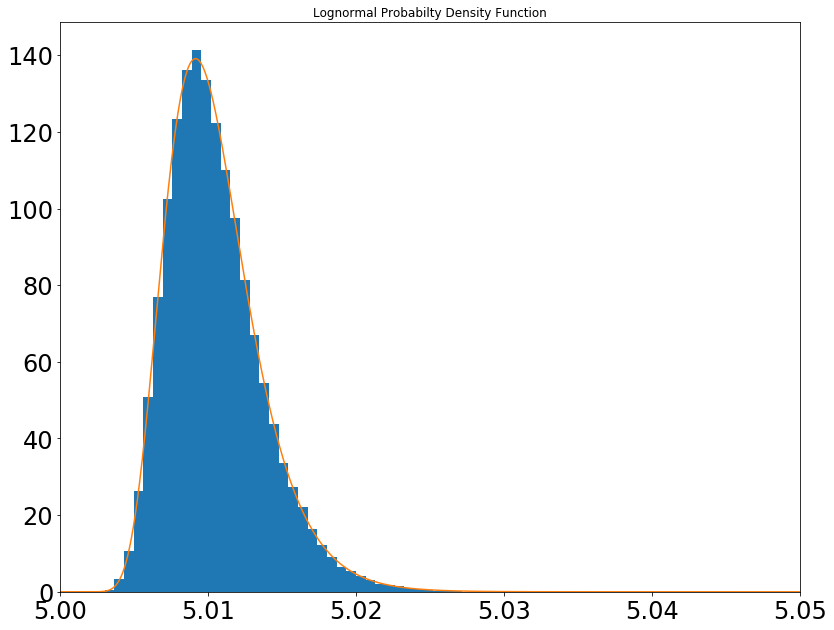

In [8]:
d = stats.lognorm.rvs(0.3, loc = 5, scale = 0.01, size = 100000)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(11,8.5)                   
fig.tight_layout()   

ax.hist(d,50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([5,5.05])
x = np.linspace(4.95,5.05,100000)
ax.set_title("Lognormal Probabilty Density Function")
ax.plot(x,stats.lognorm.pdf(x, 0.3, loc = 5, scale = .01))
plt.show()

### 3) Imagine that your signal-free data follows the distribution you have chosen; and you have a measurement for which you need to determine the 'sigma'

#### A) Select a value for your hypothetical measurement

I will choose the hypothetical measurement of 5.02 from the lognormal plot above.

#### B) Clearly state the statistical question you want to ask in words


What is the probability of getting a value greater than 5.02 from the signal-free data following the lognormal distribution above?

#### C) Convert your word question into a mathematical integral

Probability = $\int_5^\infty \frac{1}{sx\sqrt{2\pi}}e^{-\frac{log^2(x)}{2s^2}}dx $

#### D) Use the math to calculate the probability that the background produced the signal (Hint: you will want to use the statistics functions to do the integrals. cdf() and icdf() in MatLab; .cdf() and .ppf() in scipy).

In [9]:
probability = stats.lognorm.cdf(5.02, 0.3, loc = 5, scale = 1)
print(probability)

3.619210441757344e-39


#### E) Convert your probability into an equivalent 'sigma'

In [10]:
sigma = stats.lognorm.ppf(probability, 0.3)
sigma

0.019999999999999567

### 4. Now explore a little bit. Try various hypothetical measurement values and see how the probabilities and 'sigmas' change. Discuss the patterns that you see.

In [11]:
hypo_meas = np.array([5.01, 5.013, 5.015, 5.017, 5.025])
probabilities = stats.lognorm.cdf(hypo_meas, 0.3, loc = 5, scale = 1)
sigma = stats.lognorm.ppf(probabilities, 0.3)

In [12]:
table = pd.DataFrame(columns={"Measurement", "Sigma", "Probabilities"})
table["Measurement"] = hypo_meas
table["Probabilities"] = probabilities
table["Sigma"] = sigma

table

,Sigma,Probabilities,Measurement
0,0.010,1.755513e-53,5.010
1,0.013,8.587970e-48,5.013
2,0.015,7.902087e-45,5.015
3,0.017,2.567215e-42,5.017
4,0.025,4.743009e-35,5.025


As the measurement increases, so does the probabilites and the sigma. 

### 5. In many physics contexts we are counting descrete events. We can detect 9 gamma-rays or 10 gamma-rays, but 9.2 gamma-rays makes no sense. In these contexts the continuous distributions make no sense and we instead must use discrete distributions. The two most common of these are the Binomial and the Poisson (which is a limiting case of the Binomial). One of you will study the Binomial, and the other the Poisson. Flip a coin to figure out who does which.



#### A) Read up on the distributions

The flip of a coin landed me with Binomial distributions. This is a discrete probability distribution that accounts for the number of successful attempts in a number of indepent experiments that can only result in success or failure. Additionally, the probability of a success is defined for the specific circumstance.

#### B) Make a series of plots with different parameters; and explain the features. (Hint: your plots will need to be discrete, sometimes 'stairs' style plots can be helpful).

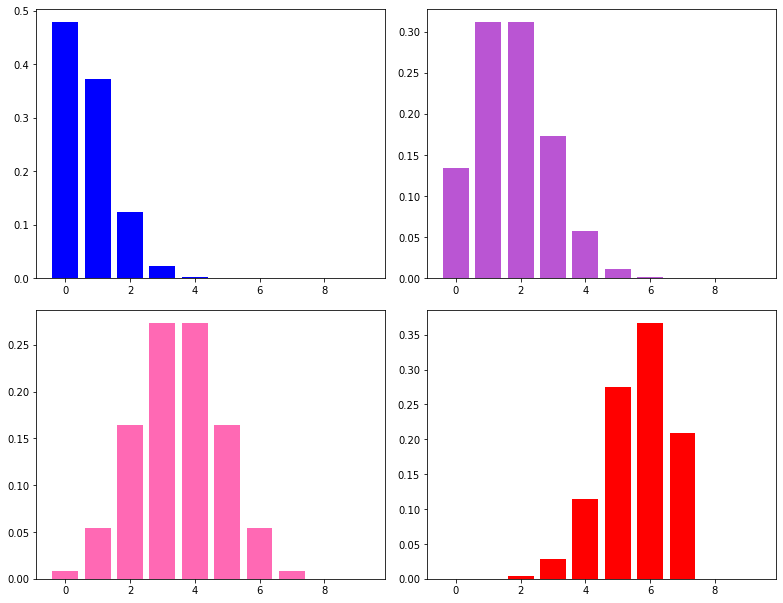

In [16]:
# In this series of plots I am changing the probabilty of getting x successes while maintaining the amount of trials.
x = np.arange(0, 10,1)

fig, ax = plt.subplots(2,2)                                              
fig.set_size_inches(11,8.5)                                               

fig.tight_layout()                                                        

ax[0,0].bar(x, stats.binom.pmf(x,7, 0.1), color='b')              

ax[0,1].bar(x, stats.binom.pmf(x,7, 0.25), facecolor='MediumOrchid')                       

ax[1,0].bar(x,stats.binom.pmf(x,7, 0.5), facecolor='HotPink')       
                                               
ax[1,1].bar(x, stats.binom.pmf(x,7, 0.8), color='r'); 

From the plots above, we can see that as proability increases, so does the number of successes.

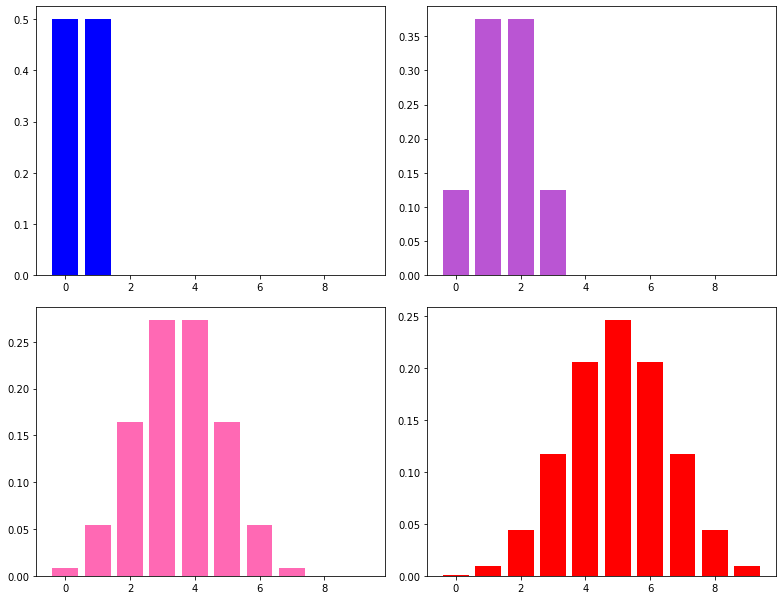

In [17]:
#In this set of plots, I maintain the probability to be 50% while changing the number of experiments.
fig, ax = plt.subplots(2,2)                                              
fig.set_size_inches(11,8.5)                                               

fig.tight_layout()                                                        

ax[0,0].bar(x, stats.binom.pmf(x,1, 0.5), color='b')              

ax[0,1].bar(x, stats.binom.pmf(x,3, 0.5), facecolor='MediumOrchid')                       

ax[1,0].bar(x,stats.binom.pmf(x,7, 0.5), facecolor='HotPink')       
                                               
ax[1,1].bar(x, stats.binom.pmf(x,10, 0.5), color='r'); 

Maintaing the proabability at fifty percent while increasing the trials, begins to turn this binomial distribution into something that looks almost Gaussian. 

#### C) Again define a hypothetical question (clearly stated), and calculate the corresponding probability

**Hypothetical Question:** A gymnast has a 60% probabilty of sticking her beam routine. If her coach asks her to do 15 routines, what is the probability of her sticking only 3 routines (and inciting the wrath of her coach)?

In [15]:
stats.binom.pmf(3,15,0.6)

0.0016488647884800086

**Answer**: The probability of her sticking 3 of the 15 routines is only 0.16%

#### D) Because the distributions are discrete, so are the probabilities and 'sigmas'. Think about this and discuss the implications for experiments.

This just means that some probabilities and sigmas are not possible for certain experiments as the results are discrete.

#### E) While the results are discrete, the parameters of the distributions are not. For example, the mean of a Poisson distribution can be 9.2. Think about and explain why this makes sense and what changes continuously and what doesn't.

The mean of a binomial distibution is the number of trials times the probability of success (mean = np). The results can be either success of failure, thus their nature being discrete. The percentage parameter, on the otherhand, does not have to be discrete. This then allows for the mean to be non-discrete as well. 